## Домашнее задание по теме: "Поиск выбросов и генерация новых признаков"

Описание задания:
    
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

### 1. Получите данные и загрузите их в рабочую среду.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# загрузка csv в google colab
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [ ]:
df = pd.read_csv('./glass.csv')

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## 2. Проведите первичный анализ.

а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [ ]:
# словарь с классом стекол
# bw -- building windows
# bwn -- building windows non
# vw -- building windows

glass_class = [
    'bw_float_processed',
    'bwn_float_processed',
    'vw_float_processed',
    'containers',
    'tableware',
    'headlamps'
]

Text(0.5, 0, 'Class')

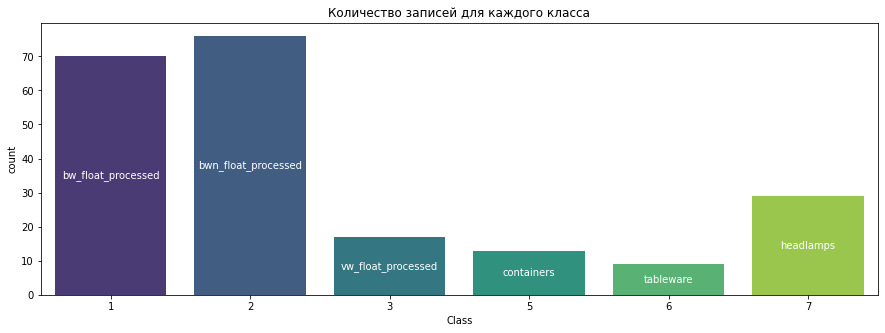

In [ ]:
# построение графика с количеством через countplot
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=df['Type'], palette='viridis')
ax.set_title('Количество записей для каждого класса')
ax.bar_label(container=ax.containers[0], labels=glass_class, label_type='center', color='w')
ax.set_xlabel('Class')

Вывод: в датасете преобладают классы: 2 (building_windows_non_float_processed) и 1 (building_windows_non_float_processed).

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Type', axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8372093023255814

### Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

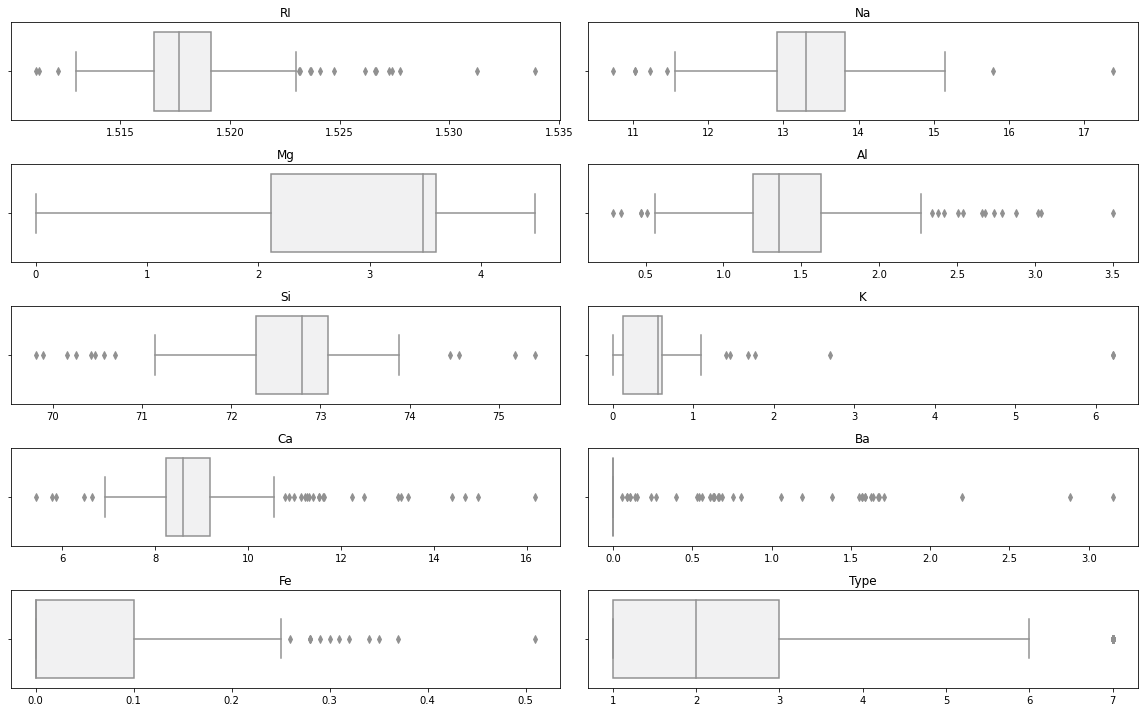

In [ ]:
# boxplot по всем признакам из датасета
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 10))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x=df.iloc[:, i], ax=ax, palette='light:b')
    ax.set_title(df.columns[i])
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

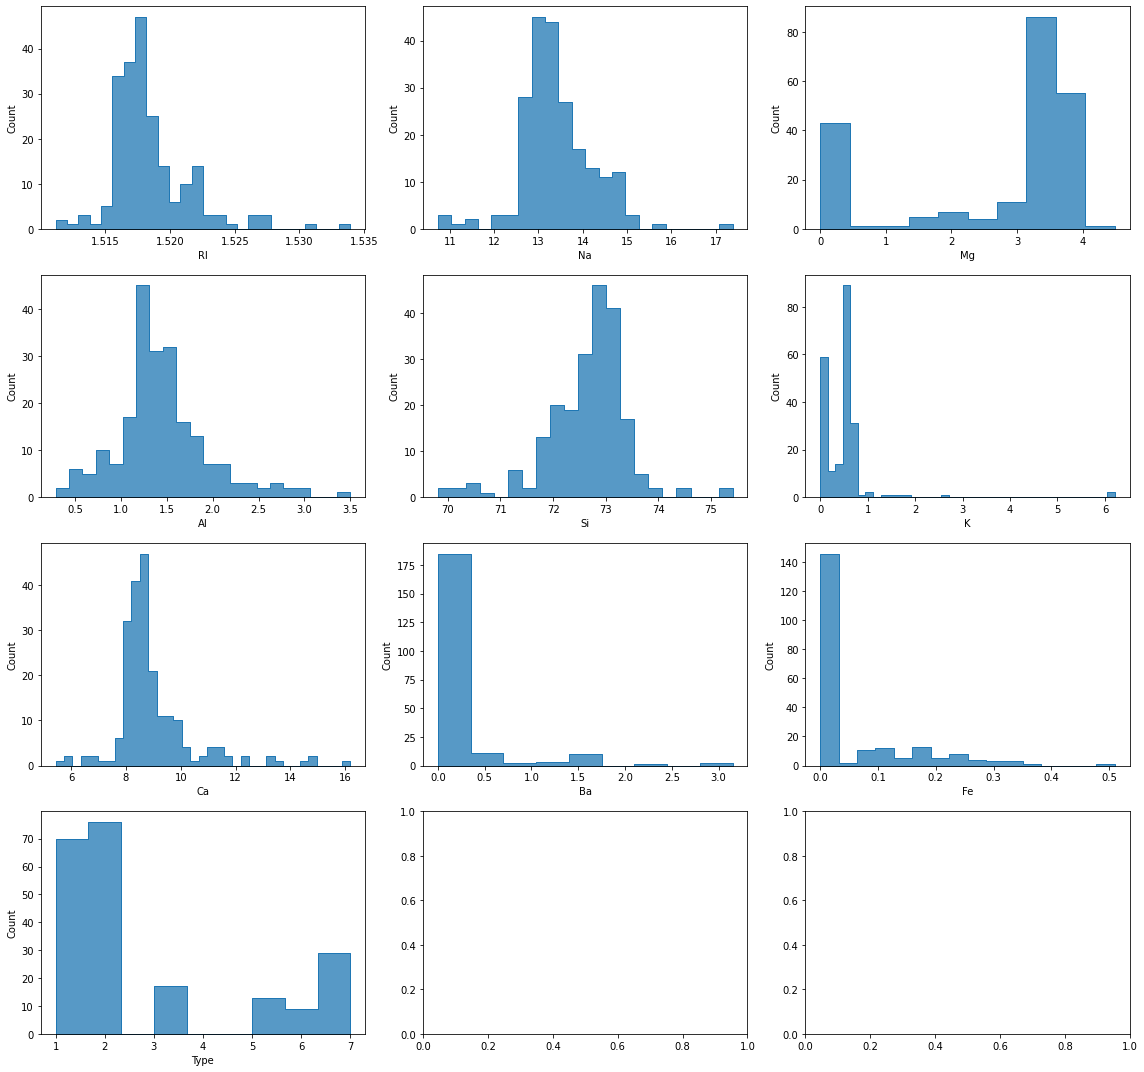

In [ ]:
# displot по всем признакам из датасета
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 15))

for i, ax in zip(range(10), axs.flat):
    sns.histplot(df.iloc[:, i], ax=ax, element='step')

plt.tight_layout()
plt.show()

Признаками с примерно нормальным распределением можно считать: Ri, Na, Ma, Si, Ca

In [ ]:
# поиск выбросов методом изолированного леса
from sklearn.ensemble import IsolationForest
ifclf = IsolationForest(random_state=42)
ifclf.fit(X_train)
ifclf_labels = ifclf.predict(X_train)
print(f'Количество найденных выбросов методом Isolation Forest: {len(np.where(ifclf_labels == -1)[0])}')

Количество найденных выбросов методом Isolation Forest: 21


In [ ]:
# поиск выбросов методом DBScan
from sklearn.cluster import DBSCAN
dbsclf = DBSCAN(eps=0.9, min_samples=5)
dbsclf.fit(X_train)
print(f'Количество найденных выбросов методом DBScan: {len(np.where(dbsclf.labels_ == -1)[0])}')

Количество найденных выбросов методом DBScan: 32


In [ ]:
# удаление выбросов
X_train_cleaned = X_train[np.where(ifclf_labels == 1, True, False)]

In [ ]:
# подсчет процента удаленных записей для каждого класса

def codr(df_full, df_train, df_train_cleaned):
    '''Функция для подсчета процента удаленных строк в каждом классе'''
    unclean_count = df_full.iloc[df_train.index].groupby('Type')['Type'].count()
    clean_count = df_full.iloc[df_train_cleaned.index].groupby('Type')['Type'].count()
    for _class, unclean, clean in zip(unclean_count.index, unclean_count, clean_count):
        print(f'Класс: {_class}. Процент удаленных записей: {round((100 - (clean / unclean * 100)), 2)}')

In [ ]:
codr(df, X_train, X_train_cleaned)

Класс: 1. Процент удаленных записей: 0.0
Класс: 2. Процент удаленных записей: 11.29
Класс: 3. Процент удаленных записей: 0.0
Класс: 5. Процент удаленных записей: 44.44
Класс: 6. Процент удаленных записей: 16.67
Класс: 7. Процент удаленных записей: 42.86


### 7. Повторите п. 4, п. 5.

In [ ]:
y_train_cleaned = df.iloc[X_train_cleaned.index]['Type']

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cleaned, y_train_cleaned)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.813953488372093

### 8. Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

В процессе выполнения задания была обучена модель (методом "случайного леса"), визуализированы значения переменных. Признаки были проанализированны на наличие нормального распределения.

Поиск выбросов осуществлялся методами изолированного леса и DBScan.

После удаления найденных выбросов точность модели ухудшилась (0.8372 | 0.8140). На мой взгяд, это связанно с тем, что сам датасет небольшой по объему и каждая запись вносит большой вклад для обучения всей модели.

Данные на выбросы необходимо исследовать в любом случае, т.к. они могут серьезно ухудшить качество модели.

Плюсом является возможное улучшение качества, минусом - потеря данных.